In [74]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import rayleigh
import pandas as pd

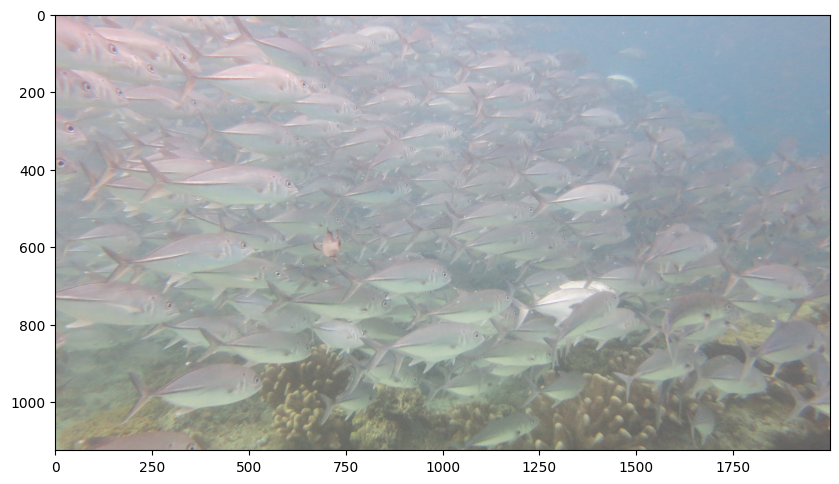

In [75]:
# Load the image
image = cv2.imread('2.png')

# Check if the image has been correctly loaded
if image is None:
    print("Could not open or find the image")
else:
    # Convert the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.show()

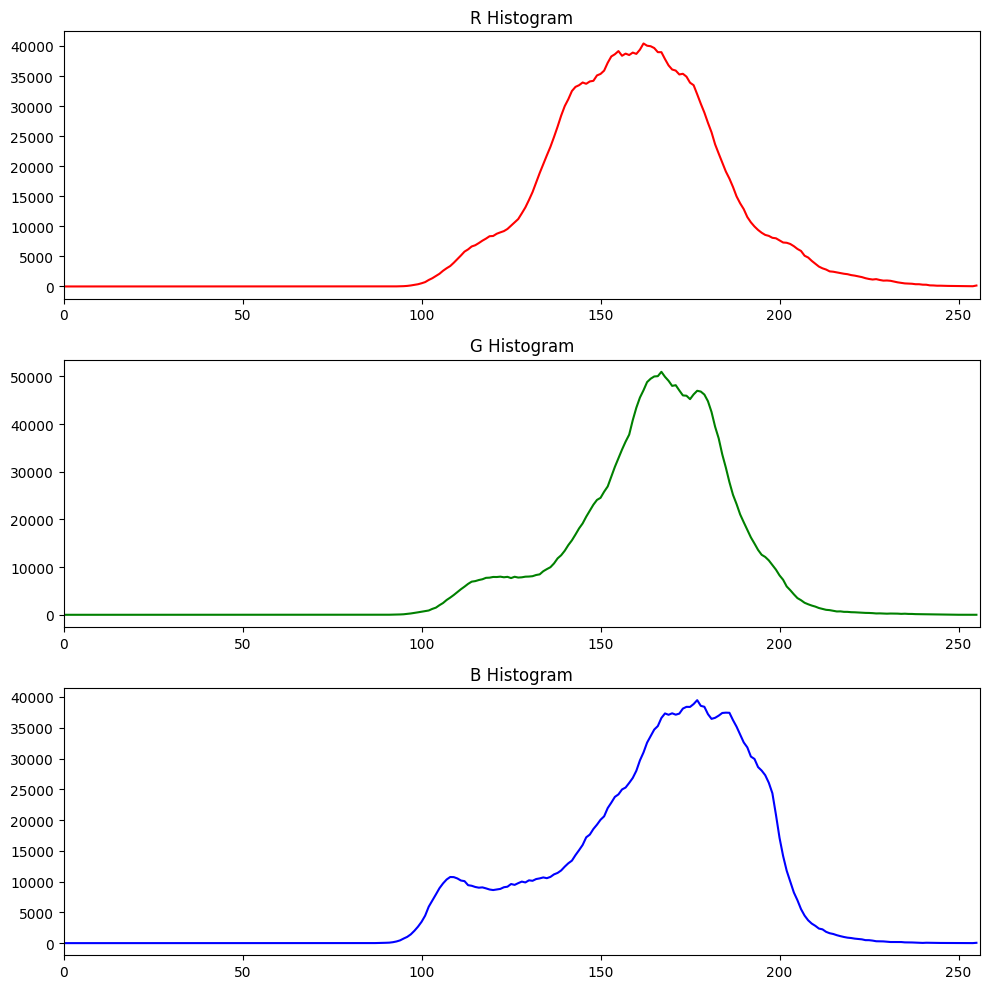

In [76]:
# Split the image into its RGB components
R, G, B = cv2.split(image)

# Create a figure with 3 subplots for R, G, B respectively
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plot the RGB histograms
for (channel, color, ax) in zip((R, G, B), ('r', 'g', 'b'), axs):
    histogram = cv2.calcHist([channel], [0], None, [256], [0, 256])
    ax.plot(histogram, color=color)
    ax.set_xlim([0, 256])
    ax.set_title(f'{color.upper()} Histogram')

plt.tight_layout()
plt.show()

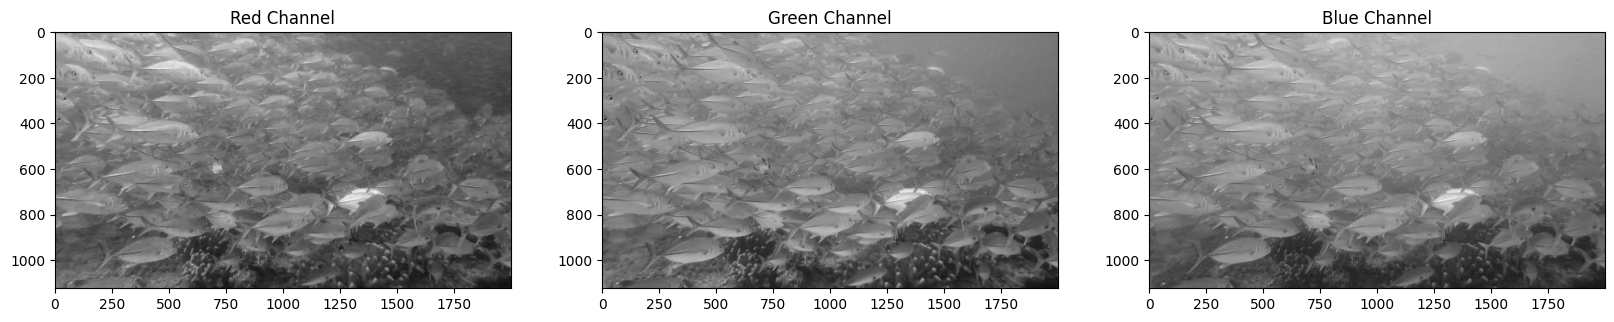

In [77]:
# Display the channels
plt.figure(figsize=(20, 20))

plt.subplot(1, 3, 1)
plt.imshow(R, cmap='gray')
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.imshow(G, cmap='gray')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.imshow(B, cmap='gray')
plt.title('Blue Channel')

plt.show()

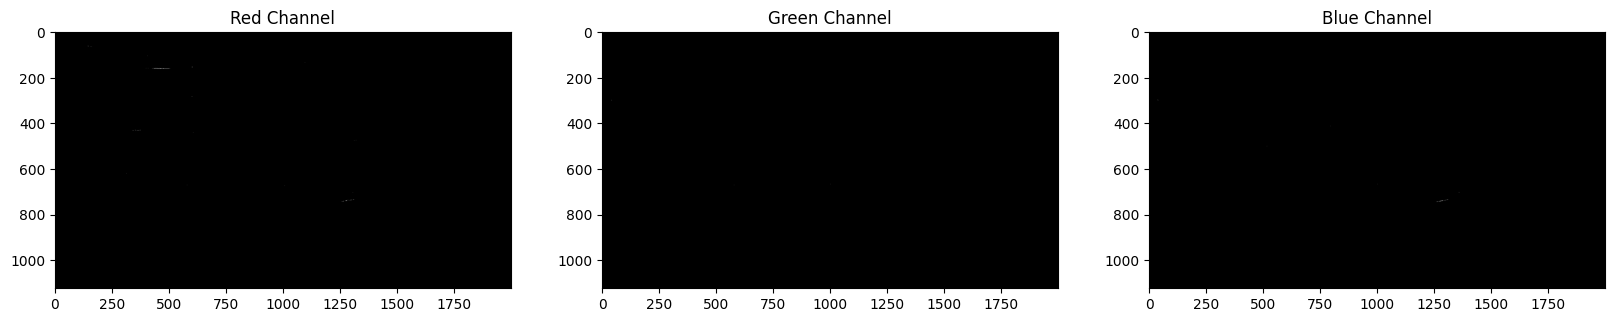

In [78]:

from scipy.stats import rayleigh

#

# Define the CLAHE algorithm with 8x8 tiles
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Apply the CLAHE algorithm to each channel
R_clahe = clahe.apply(R)
G_clahe = clahe.apply(G)
B_clahe = clahe.apply(B)

# Apply Rayleigh distribution
alpha = 0.4
x = np.arange(0, 256, 0.01)
pdf = x / (alpha**2) * np.exp(-x**2 / (2 * alpha**2))
cdf = 1 - np.exp(-x**2 / (2 * alpha**2))

R_rayleigh = np.interp(R_clahe, cdf * 255, x)
G_rayleigh = np.interp(G_clahe, cdf * 255, x)
B_rayleigh = np.interp(B_clahe, cdf * 255, x)

# Merge the channels
img_rayleigh = cv2.merge([R_rayleigh, G_rayleigh, B_rayleigh])
cv2.imwrite('img_rayleigh.png', img_rayleigh)
# Display the channels
plt.figure(figsize=(20, 20))

plt.subplot(1, 3, 1)
plt.imshow(R_rayleigh, cmap='gray')
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.imshow(G_rayleigh, cmap='gray')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.imshow(B_rayleigh, cmap='gray')
plt.title('Blue Channel')

plt.show()

In [70]:


# Convert the channels to DataFrames
R_df = pd.DataFrame(R_rayleigh)
G_df = pd.DataFrame(G_rayleigh)
B_df = pd.DataFrame(B_rayleigh)

# Display the DataFrames
print("Red Channel:")
print(R_df)
print("\nGreen Channel:")
print(G_df)
print("\nBlue Channel:")
print(B_df)

Red Channel:
          0         1         2         3         4         5         6     \
0     0.559125  0.559125  0.565133  0.596131  0.612377  0.622411  0.605815   
1     0.565133  0.559125  0.565133  0.580383  0.589759  0.596131  0.589759   
2     0.580383  0.574243  0.574243  0.574243  0.574243  0.574243  0.589759   
3     0.589759  0.580383  0.580383  0.580383  0.574243  0.559125  0.574243   
4     0.605815  0.605815  0.605815  0.589759  0.580383  0.565133  0.574243   
...        ...       ...       ...       ...       ...       ...       ...   
1119  0.650360  0.661378  0.661378  0.615704  0.605815  0.615704  0.615704   
1120  0.672724  0.661378  0.650360  0.632682  0.643211  0.632682  0.643211   
1121  0.661378  0.672724  0.643211  0.650360  0.643211  0.632682  0.643211   
1122  0.643211  0.650360  0.625814  0.632682  0.650360  0.632682  0.643211   
1123  0.643211  0.643211  0.615704  0.632682  0.650360  0.632682  0.650360   

          7         8         9     ...      1990 

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('image.jpg')

# Split the image into its 3 channels
b, g, r = cv2.split(image)

# Function to calculate 2D histogram and increase contrast
def process_channel(channel):
    # Calculate the 2D histogram
    hist = cv2.calcHist([channel], [0], None, [256], [0,256], accumulate=False)
    
    # Calculate the gray level differences between neighboring pixels
    diff = np.diff(channel, axis=0)
    
    # Increase the contrast by increasing the gray level differences seen frequently in the histogram
    for i in range(1, hist.shape[0]):
        hist[i] += hist[i-1]
    cdf = hist / float(hist.max())
    contrast_enhanced = np.interp(channel.flatten(), bins[:-1], cdf*255)
    return contrast_enhanced.reshape(channel.shape)

# Process each channel
b_processed = process_channel(b)
g_processed = process_channel(g)
r_processed = process_channel(r)

# Merge the processed channels back into one image
processed_image = cv2.merge([b_processed, g_processed, r_processed])

# Save the processed image
cv2.imwrite('processed_image.jpg', processed_image)